<a href="https://colab.research.google.com/github/boxed-mikann/google_colab_ipynb/blob/main/ScienceTour202508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 神戸高校サイエンスツアー2025

### 「見る・聞くを支えるヒト脳活動の解析」
### 知覚・認知神経科学研究室（西本研究室）
https://nishimotolab.org

<br>

## 解析体験・資料

<br>

<font color="red">資料・データの閲覧・共有は受講者限りとします。</font>

<br>

## (0) Google Colab利用の準備を行う


1.   Googleアカウントを作成する（Gmail等を使っているなら既にアカウントを持っています）
2.   Google Colabを開く　https://colab.research.google.com/?hl=ja
3.   （ファイルー）「ノートブックを新規作成」

<img src="https://nishimotolab.org/images/seeds/colab0.png" width=70%>

4.   実行ボタン（左上部の右向き三角アイコン）を押してGoogle Colabクラウドサーバへの接続を行う（数秒待つ）
5.   ボタン横の長方形部分（セル）に半角文字で「1+5」等と入力して実行ボタンを押し、セルの下に計算結果が出力（表示）されることを確かめる

<br><br>

#### Google Colabとは

*   Google社が提供するオンラインのPythonプログラミング環境
*   ブラウザ（Edge、Safari、Chrome等）上で動作する
*   ブラウザが動くならユーザー側の環境はタブレット（iPad等）やスマートフォン等でも可
*   実際の計算は個々に割り当てられたクラウドサーバ（世界のどこかにあるコンピュータ）上で行われる
*   割り当てられたクラウドサーバは最大で12時間連続で利用できる（無料利用の場合）


<br><br>

---


## (1) Google Colabで計算する

In [ ]:
x=5+6
y=2*x
print("Answer: ", y)

Answer:  22




*   計算・プログラミングの実行はセル（灰色の四角）単位で行われる
*   xやyなどの文字（変数）を使うことが出来る
*   様々な動作を行う関数（上ではprint()など）が用意されている
*   補足：割り当てられたクラウドサーバがどこにあるかを知りたければ「!curl ipinfo.io」を実行


<br><br>

---


## (2) 作図する

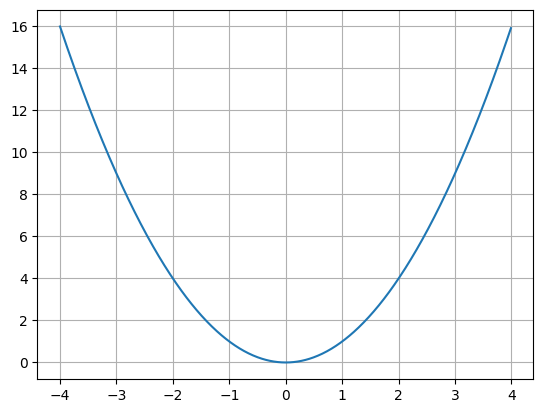

In [ ]:
import numpy as np   #数値計算用ライブラリNumPyを読み出してnpと名付ける
import matplotlib.pyplot as plt   #作図用ライブラリを読み出してpltと名付ける

x = np.arange(-4, 4, 0.01)   #-4から4まで0.01刻みで大きくなる等差数列を作ってxに代入
y = x ** 2   #PythonではAのn乗をA**nと書く

plt.plot(x, y)
plt.grid()

### **演習１：　様々な関数をプロットしてみましょう**


二次関数

```python
y = x**2 + 2*x - 3
```

各種の数学関数
```python
y = np.exp(-x**2) * np.sin(3*x) # ライブラリnpから指数関数expと三角関数sinを呼び出す
```

<br>

応用：

他の数学関数について知りたい→「numpy 対数関数」等でWeb検索

他のプロットについて知りたい→「matplotlib　例」等でWeb検索

<br><br>

---


## (3) ファイルをダウンロードする

In [ ]:
!wget https://www.dropbox.com/s/upm85oj8rizkav4/MRI_anat.npz
!wget https://www.dropbox.com/s/g68uu6swuk6zfxk/fMRI_data1.npz
!wget https://www.dropbox.com/s/j55c318g56qa10p/fMRI_data2.npz

ファイルがクラウドサーバにダウンロードされたことを確認

（画面左側のフォルダアイコンをクリック）

<img src="https://nishimotolab.org/images/seeds/files.png" width=40%>

*   同じクラウドサーバを利用し続ける限り上記のファイルが利用できる。
*   別のクラウドサーバが割り当てられた（12時間以上経った、接続が切れた）場合は再度のダウンロードが必要。
*   「.npz」はNumPyデータを扱うファイル形式の一つ。




<br><br>

---


## (4) 脳構造（MRI）データを扱う（ヒト脳断面の表示）


今回扱う脳構造データ（MRI_anat.npz）の情報：

*   被験者： 17歳女性/健康
*   撮像形態： 頭部3次元構造画像（X-Y-Z）
*   撮像の空間解像度： 1.3 x 1.0 x 1.0 mm
*   撮像ボクセル数： (128, 192, 256)   （ボクセル: voxel = volumetric pixel）
*   脳データ共有サイトOpenNeuroから取得（[LiteBook Alertness Study ](https://openneuro.org/datasets/ds004219/versions/1.0.0); CC0）
*   個人情報保護のためdeface処理済み


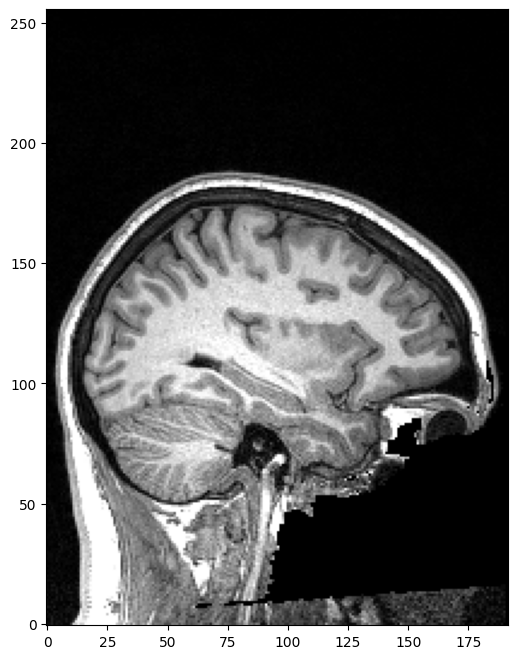

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('MRI_anat.npz')
br = data['anat']   #脳構造データ（3次元; X-Y-Z）を読み出し

img = br[85, :, :]   #3次元のデータのうちのある１断面（85番目のスライス）を指定。「:」はその次元のすべてのデータという意味
img = np.transpose(img, [1, 0])   #０次元目と1次元目を入れ替え（転置、ここでは表示のため）

plt.figure(figsize = (8, 8))
plt.imshow(img, origin = 'lower', cmap = 'gray', vmax = 120)
plt.show()



参考： 断面の名前

<img src="https://nishimotolab.org/images/seeds/sagittal_plane_coronal_plane_horizontal_plane.png" width=60%>

[看護roo!](https://www.kango-roo.com/ki/image_2024/)ー身体の方向をあらわす３つの基準面（矢状面（正中面）、冠状面、水平面）のイラストより

<br><br>

### **演習2: 脳構造データを可視化してみよう**

1.   別の位置の断面（スライス）を表示してみましょう
2.   冠状（前頭）断面および水平（横）断面を表示してみましょう

　　　（ヒント：上記(4)のコードについてスライス位置や方向を修正）


<br>

応用：

imshowのオプションについて知りたい

→ 「matplotlib imshow」等でWeb検索

→ imshowの公式ドキュメント（英語）を確認 　[matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)






<br><br>

---


## (5) 脳機能（fMRI）データを扱う１（ボクセルごとの応答再現性解析）


使用するデータ（fMRI_data1.npz）の情報

*   撮像形態： 頭部4次元脳活動画像（時間-X-Y-Z）
*   提示刺激： 2分間（120秒）の動画の5回繰り返し提示
*   撮像時間： 2秒/全脳サンプル
*   撮像サンプル数： 300
*   撮像の空間解像度： 2.0 x 2.0 x 2.0 mm
*   撮像ボクセル数： (72,96,96）
*   解析のための前処理（脳抽出・動き補正・長期トレンド除去）済み


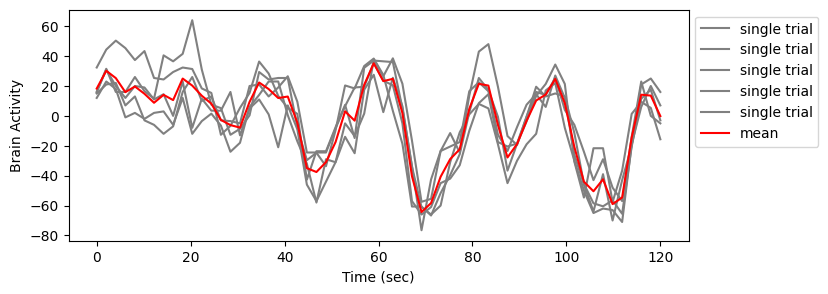

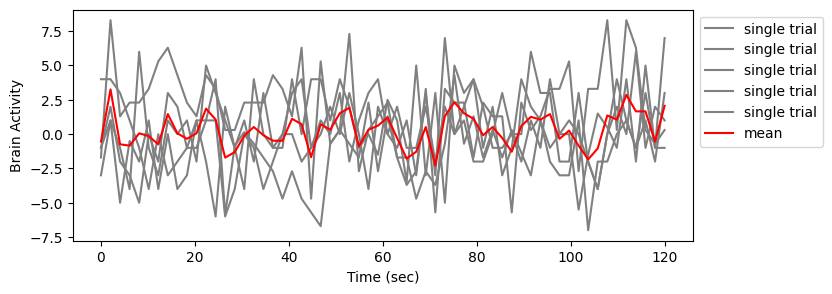

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('fMRI_data1.npz')
r_all = data['func']   #脳機能データ（4次元; 時間-X-Y-Z）を読み出し

r1 = r_all[:, 29, 70, 44]   #ある一空間座標（単一ボクセル）の応答時系列の取り出し
r2 = r_all[:, 25, 81, 57]   #別の一空間座標（単一ボクセル）の応答時系列の取り出し

for r in [r1, r2]: #r1とr2について繰り返し（ループ）処理
  r = np.reshape(r, [5, 60])  #rを[繰り返し回数(5回） x 時間サンプル数（120秒/（2秒/サンプル）=60サンプル）]にreshape
  xt = np.linspace(0,120,60) #横軸（時間）を設定（120秒を2秒ごとに60分割）

  #プロットの表示
  plt.figure(figsize = (8, 3))
  plt.plot(xt, r.T, color='gray', label='single trial') #単一試行データのプロット
  plt.plot(xt, np.mean(r, axis=0), color='red', label='mean') #平均のプロット
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) #凡例ラベルの表示
  plt.ylabel('Brain Activity')
  plt.xlabel('Time (sec)')
  plt.show()


ある脳部位は同じ動画刺激の繰り返しに対して似たような応答をしている

　　→動画の内容に関する何らかの情報に応答している

<br>

ある脳部位は同じ動画刺激の繰り返しに対して毎回ばらばらな応答をしている

　　→動画の内容とは無関係な何かを行っている

<br>

**脳部位ごとの応答再現性を定量してその空間分布を見ることで、脳のどこが動画を処理しているかが分かるはず**

<br>

応答再現性指標EV（stimulus Explainable Variance）:


$EV = 1 - \dfrac{平均周りの分散}{全体の分散}$


*   応答の再現性が高い → 時系列が平均に近い（平均周りの分散が小さい） → EV大
*   応答の再現性が低い → 時系列が平均から遠い（平均周りの分散が大きい） → EV小




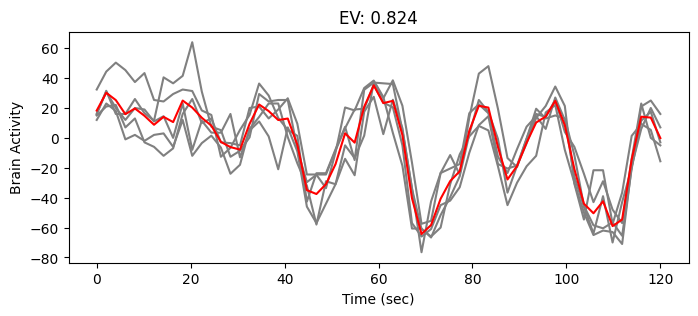

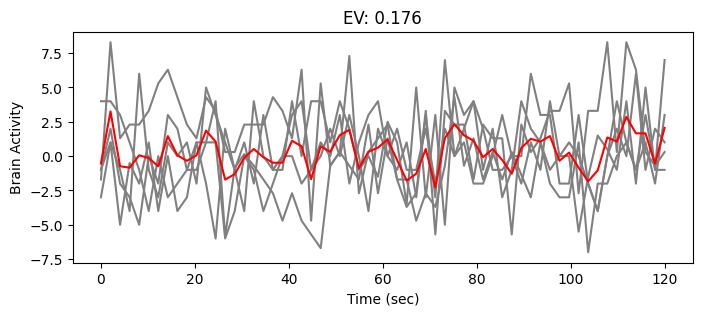

In [ ]:
for r in [r1, r2]:
  r = np.reshape(r, [5, 60])   #[繰り返し回数(5回） x 時間サンプル数（120秒/（2秒/サンプル）=60サンプル）]にreshape
  xt = np.linspace(0,120,60)   #横軸（時間）を設定（120秒を2秒ごとに60分割）

  # EVの計算（単一ボクセルに関する計算）
  m = np.mean(r, axis=0)   #繰り返し回数方向に平均
  var_all = np.var(r)   #全体の分散を計算
  var_err = np.var(r - m)   #エラー（平均周りの分散）を計算
  ev=1 - var_err/var_all   #応答再現性指標EV値を計算

  #プロットの表示
  plt.figure(figsize=(8,3))
  plt.plot(xt, r.T, color='gray')
  plt.plot(xt, np.mean(r, axis=0), color='red')
  plt.ylabel('Brain Activity')
  plt.xlabel('Time (sec)')
  plt.title('EV: '+str(np.round(ev,3)))
  plt.show()



<br><br>

---


## (6) 脳機能（fMRI）データを扱う２ （全脳の応答再現性解析）



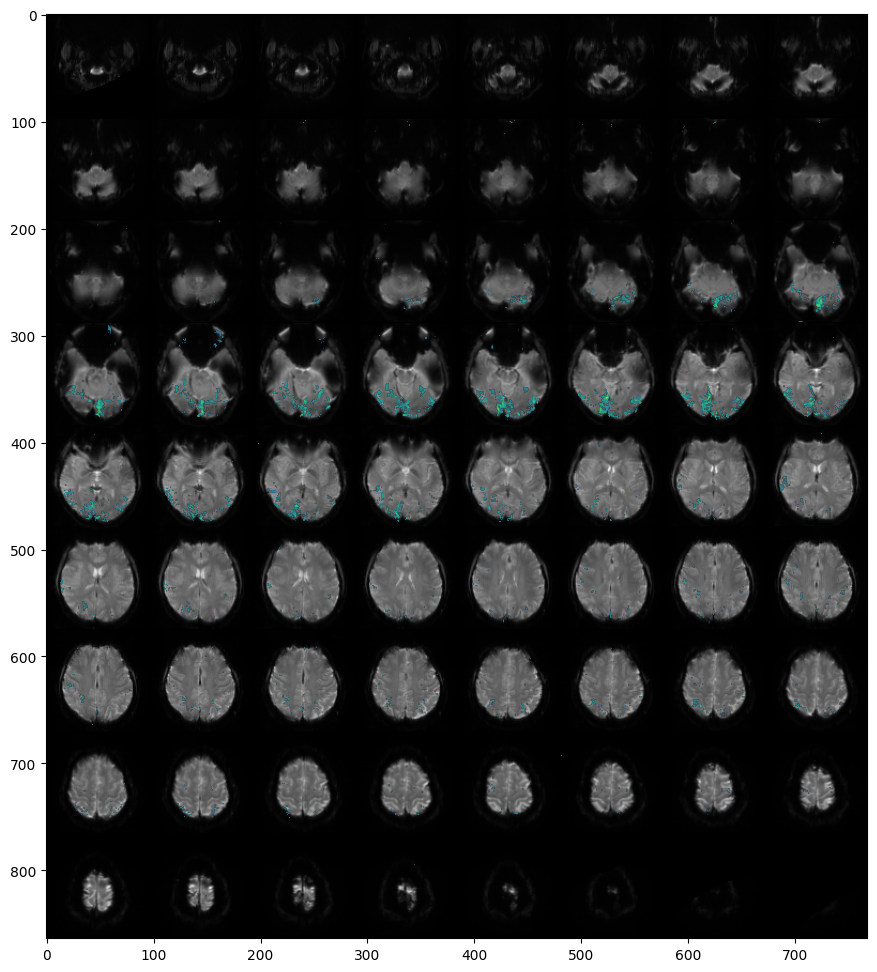

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('fMRI_data1.npz')
r_all = data['func']

r_all = np.reshape(r_all, (5, 60, 72, 96, 96))   #（繰り返し回数5回-時間60サンプル-X-Y-Z）の5次元データにreshape

### EVの計算（全脳一括計算）
m = np.mean(r_all, axis=0)   #繰り返し回数方向に平均
var_all = np.var(r_all, axis=(0,1))   #全体の分散を計算
var_err = np.var(r_all-m, axis=(0,1))   #エラー（平均周り）の分散を計算
var_all[var_all==0] = np.nan #ゼロ除算を回避
ev = 1 - var_err / var_all   #応答再現性指標EV値を計算

### スライス一覧表示のための操作（多次元認識のための頭の体操？）
d4 = np.reshape(ev, [9, 8, 96, 96]) #スライスを4次元にreshape
d4 = np.transpose(d4, [0, 2, 1, 3]) #4次元データを転置(transpose)
d2 = np.reshape(d4, [9*96, 8*96]) #スライスを2次元にreshape
ev2d = d2

### EVが一定以上の部位のみ表示
masked_ev = np.ma.masked_where(ev2d<=0.35, ev2d)

### 結果の表示
plt.figure(figsize=(12,12))
ref2d = data['ref2d']
plt.imshow(ref2d,cmap='gray')   #参照用の脳の形を背景として表示（水平断面の一覧表示）
plt.imshow(masked_ev, vmin=0, vmax=1)   #EV値が高いボクセルについて透過表示
plt.show()

### **演習3: 脳機能データを解析してみよう**

脳機能データ2（fMRI_data2.npz）にも繰り返し動画刺激実験に対する脳活動が入っています。データ2の実験では2分半（150秒）の動画が4回繰り返し提示されていました。また、データ1とデータ2のどちらかの動画は視聴覚刺激(A)が提示され、別の一方は視覚刺激のみ（音無し）(B)が提示されていました。他の条件（2秒で全脳スキャン、2mm角解像度）はデータ1とデータ2の実験で同一でした。

<br>

1. データ2（fMRI_data2.npz）についても上記データ1と同様に応答再現性（EV）解析を行い、結果を表示してみましょう。

　　　　ヒント：上記(6)のプログラムのうちの**ある2行**について一部変更

<br>

2. 1.の結果から、データ1とデータ2のどちらが(A)と(B)どちらの動画刺激を用いていたのか推定してみましょう。

　　　　ヒント：ヒト脳における視覚野と聴覚野の位置

<br>

3.  （オプション・難）上記の表示を矢状面に変更してみましょう。

　　　　ヒント：いったん4次元にしてから2次元に戻す




<br><br>


---





解答編

https://colab.research.google.com/drive/1eRwjnNA_U8_BobDdDjyCkoJqKUquSLse?usp=sharing